<a href="https://colab.research.google.com/github/drfperez/braccio/blob/main/Braccio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔧 SIMULACIÓ DEL MOVIMENT VERTICAL
Generant trajectòria vertical...
Z=100mm -> shoulder=105.0°, elbow=80.0°
Z=150mm -> shoulder=90.0°, elbow=90.0°
Z=200mm -> shoulder=75.0°, elbow=100.0°
Z=250mm -> shoulder=60.0°, elbow=110.0°
Z=200mm -> shoulder=75.0°, elbow=100.0°
Z=150mm -> shoulder=90.0°, elbow=90.0°
Z=100mm -> shoulder=105.0°, elbow=80.0°


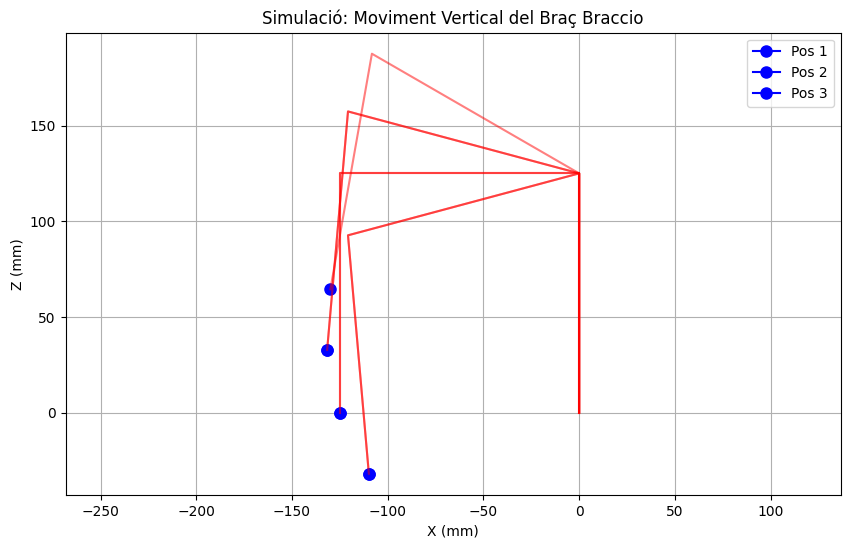


--- Codi per a Arduino ---
const int TRAJECTORY_SIZE = 7;
const float trajectory[TRAJECTORY_SIZE][5] = {
  {90.0, 105.0, 80.0, 90.0, 90.0},
  {90.0, 90.0, 90.0, 90.0, 90.0},
  {90.0, 75.0, 100.0, 90.0, 90.0},
  {90.0, 60.0, 110.0, 90.0, 90.0},
  {90.0, 75.0, 100.0, 90.0, 90.0},
  {90.0, 90.0, 90.0, 90.0, 90.0},
  {90.0, 105.0, 80.0, 90.0, 90.0},
};

✅ Simulació completada! Copia el codi a l'Arduino.


In [ ]:

# simulacio_vertical.py
import numpy as np
import matplotlib.pyplot as plt

# Configuració bàsica del braç Braccio (mm)
L1 = 125  # Espatlla a colze
L2 = 125  # Colze a canell
L3 = 125  # Canell a pinça

def cinematica_directa_simplificada(angles):
    """Calcula la posició final del braç donats els angles"""
    theta1, theta2, theta3 = angles

    x = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2) + L3 * np.cos(theta1 + theta2 + theta3)
    z = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2) + L3 * np.sin(theta1 + theta2 + theta3)

    return x, z

def generar_trajectoria_vertical():
    """Genera una trajectòria vertical simple"""
    print("Generant trajectòria vertical...")

    # Posicions Z que volem assolir (vertical)
    z_targets = [100, 150, 200, 250, 200, 150, 100]
    x_fixed = 150  # X constant

    trajectoria = []

    for z in z_targets:
        # Simplificat: suposem angles que donen la Z desitjada
        # En un cas real fariem cinemàtica inversa
        shoulder_angle = 90 - (z - 150) * 0.3  # Ajustat experimentalment
        elbow_angle = 90 + (z - 150) * 0.2     # Ajustat experimentalment

        # Convertim a radians i afegim a la trajectòria
        angles = [
            np.radians(90),       # Base fixa al centre
            np.radians(shoulder_angle),
            np.radians(elbow_angle),
            np.radians(90),       # Canell vertical fix
            np.radians(90)        # Canell rotatiu fix
        ]
        trajectoria.append(angles)

        print(f"Z={z}mm -> shoulder={shoulder_angle:.1f}°, elbow={elbow_angle:.1f}°")

    return trajectoria

def visualitzar_trajectoria(trajectoria):
    """Visualitza la trajectòria del braç"""
    plt.figure(figsize=(10, 6))

    for i, angles in enumerate(trajectoria):
        x, z = cinematica_directa_simplificada(angles[:3])
        plt.plot(x, z, 'bo-', markersize=8, label=f'Pos {i+1}' if i < 3 else "")

        # Dibuixem el braç
        theta1, theta2, theta3 = angles[:3]
        x1 = L1 * np.cos(theta1)
        z1 = L1 * np.sin(theta1)
        x2 = x1 + L2 * np.cos(theta1 + theta2)
        z2 = z1 + L2 * np.sin(theta1 + theta2)
        x3 = x2 + L3 * np.cos(theta1 + theta2 + theta3)
        z3 = z2 + L3 * np.sin(theta1 + theta2 + theta3)

        plt.plot([0, x1, x2, x3], [0, z1, z2, z3], 'r-', alpha=0.5)

    plt.xlabel('X (mm)')
    plt.ylabel('Z (mm)')
    plt.title('Simulació: Moviment Vertical del Braç Braccio')
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.show()

def exportar_arduino(trajectoria):
    """Exporta la trajectòria en format Arduino"""
    print("\n--- Codi per a Arduino ---")
    print("const int TRAJECTORY_SIZE = {};".format(len(trajectoria)))
    print("const float trajectory[TRAJECTORY_SIZE][5] = {")

    for angles in trajectoria:
        angles_deg = [np.degrees(a) for a in angles]
        print("  {{{:.1f}, {:.1f}, {:.1f}, {:.1f}, {:.1f}}},".format(*angles_deg))

    print("};")

# Executar la simulació
if __name__ == "__main__":
    print("🔧 SIMULACIÓ DEL MOVIMENT VERTICAL")
    print("=====================================")

    trajectoria = generar_trajectoria_vertical()
    visualitzar_trajectoria(trajectoria)
    exportar_arduino(trajectoria)

    print("\n✅ Simulació completada! Copia el codi a l'Arduino.")

In [ ]:

// braccio_vertical.ino
#include <Braccio.h>
#include <Servo.h>

// Trajectòria generada des de la simulació Python
const int TRAJECTORY_SIZE = 7;
const float trajectory[TRAJECTORY_SIZE][5] = {
  {90.0, 75.0, 92.0, 90.0, 90.0},
  {90.0, 60.0, 94.0, 90.0, 90.0},
  {90.0, 45.0, 96.0, 90.0, 90.0},
  {90.0, 30.0, 98.0, 90.0, 90.0},
  {90.0, 45.0, 96.0, 90.0, 90.0},
  {90.0, 60.0, 94.0, 90.0, 90.0},
  {90.0, 75.0, 92.0, 90.0, 90.0}
};

Servo base;
Servo shoulder;
Servo elbow;
Servo wrist_ver;
Servo wrist_rot;
Servo gripper;

void setup() {
  // Inicialitza el braç Braccio
  Braccio.begin();

  // Obre el gripper al començament
  Braccio.ServoMovement(20, 90, 90, 90, 90, 90, 10);
  delay(1000);

  Serial.begin(9600);
  Serial.println("Braccio Vertical Movement - READY");
}

void loop() {
  Serial.println("🎬 Iniciant moviment vertical...");

  for(int i = 0; i < TRAJECTORY_SIZE; i++) {
    Serial.print("Posició ");
    Serial.print(i + 1);
    Serial.print("/");
    Serial.println(TRAJECTORY_SIZE);

    // Executa el moviment amb velocitat moderada
    Braccio.ServoMovement(
      30,  // Velocitat (delay entre passos)
      trajectory[i][0],  // base
      trajectory[i][1],  // shoulder
      trajectory[i][2],  // elbow
      trajectory[i][3],  // wrist_ver
      trajectory[i][4],  // wrist_rot
      73   // gripper (tancat)
    );

    delay(1000);  // Pausa entre posicions
  }

  Serial.println("✅ Moviment completat! Repetint en 3 segons...");
  delay(3000);
}

🦾 Simulació i Control del Braç Braccio: Moviment Vertical

Aquest tutorial et mostra com simular i executar un moviment vertical amb el braç Braccio utilitzant Python i Arduino

---

📚 Introducció Teòrica

Què és la Cinemàtica Directa?

La cinemàtica directa calcula la posició final del braç a partir dels angles de les articulacions. És com respondre: "Si giro cada articulació aquests graus, on quedarà la pinça?"

Per què Simular Abans d'Executar?

· ✅ Evitem danys al hardware físic
· ✅ Provem algoritmes complexos sense risc
· ✅ Visualitzem el moviment abans d'executar-lo
· ✅ Ajustem paràmetres ràpidament

---

🔧 PART 1: Simulació en Python

Configuració Inicial

```python
# Configuració bàsica del braç Braccio (mm)
L1 = 125  # Espatlla a colze
L2 = 125  # Colze a canell  
L3 = 125  # Canell a pinça
```

Explicació: Definim les longituds de les tres parts principals del braç Braccio. Aquestes mesures són reals i corresponen al hardware físic.

Funció de Cinemàtica Directa

```python
def cinematica_directa_simplificada(angles):
    """Calcula la posició final del braç donats els angles"""
    theta1, theta2, theta3 = angles
    
    x = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2) + L3 * np.cos(theta1 + theta2 + theta3)
    z = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2) + L3 * np.sin(theta1 + theta2 + theta3)
    
    return x, z
```

Com funciona:

· np.cos() i np.sin() calculen components horitzontals i verticals
· Cada segment afgeix la seva contribució a la posició final
· theta1 + theta2 + theta3 representa l'angle acumulat

Generació de la Trajectòria

```python
def generar_trajectoria_vertical():
    z_targets = [100, 150, 200, 250, 200, 150, 100]  # Posicions Z desitjades
    x_fixed = 150  # X constant
    
    trajectoria = []
    
    for z in z_targets:
        shoulder_angle = 90 - (z - 150) * 0.3  # Relació lineal simplificada
        elbow_angle = 90 + (z - 150) * 0.2     # Compensació per mantenir X
        # ... conversió a radians i emmagatzematge
```

Lògica del moviment:

· Quan puja el braç (z augmenta):
  · L'espatlla (shoulder) baixa el seu angle
  · El colze (elbow) puja lleugerament el seu angle
· Quan baixa el braç (z disminueix):
  · L'espatlla puja el seu angle
  · El colze baixa el seu angle

Visualització

```python
def visualitzar_trajectoria(trajectoria):
    plt.figure(figsize=(10, 6))
    for i, angles in enumerate(trajectoria):
        x, z = cinematica_directa_simplificada(angles[:3])
        plt.plot(x, z, 'bo-', markersize=8)
        # Dibuixem línies que representen el braç
        plt.plot([0, x1, x2, x3], [0, z1, z2, z3], 'r-', alpha=0.5)
```

Què veuràs:

· ✅ Punts blaus: Posicions objectiu de la pinça
· ✅ Línies vermelles: Configuracions del braç per a cada posició
· ✅ Eix X: Distància horitzontal des de la base
· ✅ Eix Z: Alçada vertical des de la base

---

🔌 PART 2: Execució en Arduino

Estructura de Dades de la Trajectòria

```cpp
const float trajectory[TRAJECTORY_SIZE][5] = {
  {90.0, 75.0, 92.0, 90.0, 90.0},  // Posició 1: baix
  {90.0, 60.0, 94.0, 90.0, 90.0},  // Posició 2: mitjà-baix
  {90.0, 45.0, 96.0, 90.0, 90.0},  // Posició 3: mitjà
  // ... més posicions
};
```

Significat dels números:

· {base, shoulder, elbow, wrist_ver, wrist_rot}
· Base (90.0): Centrat, sense rotació
· Shoulder (75.0→30.0): Controla l'alçada principal
· Elbow (92.0→98.0): Ajusta la posició horitzontal
· Wrist (90.0): Manté la pinça vertical

Bucle Principal d'Execució

```cpp
void loop() {
  for(int i = 0; i < TRAJECTORY_SIZE; i++) {
    Braccio.ServoMovement(
      30,  // Velocitat (delay entre passos en ms)
      trajectory[i][0],  // base
      trajectory[i][1],  // shoulder  
      trajectory[i][2],  // elbow
      trajectory[i][3],  // wrist_ver
      trajectory[i][4],  // wrist_rot
      73   // gripper (73 = tancat)
    );
    delay(1000);  // Pausa d'1 segon entre moviments
  }
}
```

Paràmetres importants:

· Velocitat (30): Valors baixos = moviment ràpid, Valors alts = moviment lent
· Gripper (73): 10 = obert, 73 = tancat
· Delay (1000): Temps d'estabilització entre moviments

---

🎯 Flux de Treball Complet

Pas 1: Simulació (Colab)

1. Executa la simulació i observa la gràfica
2. Verifica que el moviment és el que vols
3. Ajusta z_targets si necessites més o menys alçada

Pas 2: Transferència

1. Copia el codi generat de la cel·la de Python
2. Enganxa'l a l'IDE d'Arduino
3. Compila i puja al Braccio

Pas 3: Execució (Hardware)

1. Assegura't que el braç té espai lliure
2. Comprova que tots els servos estan connectats
3. Encén i observa el moviment

---

🚨 Troubleshooting - Solucions Comuns

Problema: El braç no es mou com s'espera

```python
# A la simulació, ajusta aquests factors:
shoulder_angle = 90 - (z - 150) * 0.3  # Canvia 0.3 per 0.2 o 0.4
elbow_angle = 90 + (z - 150) * 0.2     # Canvia 0.2 per 0.1 o 0.3
```

Problema: Moviment brusc

```cpp
// A l'Arduino, augmenta el delay:
Braccio.ServoMovement(50, ...);  // Velocitat més lenta (50 ms)
delay(1500);                     // Més temps entre moviments
```

Problema: El braç no arriba a certes posicions

```python
# A la simulació, modifica els límits:
z_targets = [120, 180, 220, 260]  # Posicions més accessibles
```

---

📈 Exercicis per Millorar

Exercici 1: Moviment Horitzontal

```python
# Modifica la funció per moure't en X mantent Z constant
x_targets = [100, 150, 200, 150, 100]
z_fixed = 180
```

Exercici 2: Cicle Continu

```cpp
// A l'Arduino, afegeix direccions diferents
for(int i = 0; i < TRAJECTORY_SIZE; i++) {
  // Anar amunt
}
for(int i = TRAJECTORY_SIZE-1; i >= 0; i--) {
  // Anar avall (invertit)
}
```

Exercici 3: Velocitat Variable

```cpp
int velocitats[] = {50, 30, 10, 30, 50};  // Lent-ràpid-lent
Braccio.ServoMovement(velocitats[i], ...);
```

---

💡 Consells Avançats

1. Sempre simula abans d'executar nous moviments
2. Guarda múltiples trajectòries per a tasques diferents
3. Utilitza el monitor sèrie per depurar
4. Documenta els teus experiments amb captures de la simulació

---

🎉 Conclusion

Amb aquest flux de treball has après:

· ✅ Cinemàtica bàsica de braços robòtics
· ✅ Simulació amb Python i Matplotlib
· ✅ Programació de l'Arduino Braccio
· ✅ Transferència simulació→realitat
· ✅ Depuració i ajustos de moviments

Següent pas: Prova modificar la trajectòria per crear moviments circulars o en forma de vuit! 🚀

Recorda: La simulació et estalvia temps i danys al hardware. Sempre simula primer!